<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #D8D8D8;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Houses in London (Predict Price) <br>
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Houses in London</div>**


## Goal
> ## Modeling : Predicting Price

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/kaggle/input/houses-in-london/london_houses.csv')
df.head(5)

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bedrooms,1000.0,3.013,1.393834,1.0,2.0,3.0,4.0,5.0
Bathrooms,1000.0,2.003,0.808483,1.0,1.0,2.0,3.0,3.0
Square Meters,1000.0,149.627,58.056200,50.0,99.0,148.0,201.0,249.0
Building Age,1000.0,49.965,29.070860,1.0,24.0,50.0,76.0,99.0
Floors,1000.0,1.991,0.821946,1.0,1.0,2.0,3.0,3.0
Price (£),1000.0,1840807.278,879348.407509,386666.0,1161400.0,1721999.0,2390500.0,4980000.0


In [5]:
df.describe(include = 'object').T

,count,unique,top,freq
Address,1000,770,96 King's Road,4
Neighborhood,1000,10,Kensington,114
Garden,1000,2,Yes,512
Garage,1000,2,Yes,501
Property Type,1000,3,Detached House,349
Heating Type,1000,4,Electric Heating,266
Balcony,1000,3,No Balcony,340
Interior Style,1000,4,Classic,263
View,1000,5,Sea,210
Materials,1000,4,Wood,264


In [6]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Address            0.0
Neighborhood       0.0
Bedrooms           0.0
Bathrooms          0.0
Square Meters      0.0
Building Age       0.0
Garden             0.0
Garage             0.0
Floors             0.0
Property Type      0.0
Heating Type       0.0
Balcony            0.0
Interior Style     0.0
View               0.0
Materials          0.0
Building Status    0.0
Price (£)          0.0
dtype: float64

Duplicate Rows (%):
0.0


In [7]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,77 Oxford Street,Chelsea,5,2,249,3,Yes,No,2,Detached House,Central Heating,High-level Balcony,Minimalist,Sea,Wood,Renovated,4980000
1,100 Baker Street,Chelsea,4,3,214,21,Yes,Yes,2,Detached House,Underfloor Heating,High-level Balcony,Modern,City,Laminate Flooring,Renovated,4280000
2,160 Oxford Street,Chelsea,4,1,225,30,Yes,Yes,1,Detached House,Electric Heating,No Balcony,Classic,Street,Wood,New,4500000
3,143 Strand,Westminster,2,3,249,14,No,No,2,Detached House,Electric Heating,High-level Balcony,Industrial,City,Marble,New,4482000
4,139 Fleet Street,Kensington,1,3,226,61,No,Yes,1,Detached House,Electric Heating,Low-level Balcony,Minimalist,Park,Laminate Flooring,Renovated,4294000
5,29 King's Road,Westminster,1,3,249,9,Yes,No,1,Detached House,Central Heating,High-level Balcony,Minimalist,Garden,Wood,Old,4482000
6,150 Oxford Street,Kensington,5,2,233,72,No,Yes,2,Detached House,Electric Heating,No Balcony,Minimalist,Sea,Marble,Old,4427000
7,37 King's Road,Westminster,2,3,243,90,No,Yes,3,Detached House,Gas Heating,High-level Balcony,Industrial,Street,Wood,Old,4374000
8,52 Fleet Street,Westminster,5,3,241,75,Yes,Yes,2,Detached House,Gas Heating,Low-level Balcony,Classic,Garden,Laminate Flooring,New,4338000
9,22 Park Lane,Westminster,5,3,240,71,No,No,3,Detached House,Central Heating,High-level Balcony,Minimalist,Sea,Wood,New,4320000


In [8]:
def outlier_remove(df, colname):  
     Q1 = df[colname].quantile(0.25)
     Q3 = df[colname].quantile(0.75)
     IQR = Q3 - Q1  
     lower_b = Q1 - 1.5 * IQR  
     upper_b = Q3 + 1.5 * IQR  
     return (df[colname] < lower_b) | (df[colname] > upper_b)

for col in df.select_dtypes(include=['number']).columns:
    df = df[~outlier_remove(df, col)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          990 non-null    object
 1   Neighborhood     990 non-null    object
 2   Bedrooms         990 non-null    int64 
 3   Bathrooms        990 non-null    int64 
 4   Square Meters    990 non-null    int64 
 5   Building Age     990 non-null    int64 
 6   Garden           990 non-null    object
 7   Garage           990 non-null    object
 8   Floors           990 non-null    int64 
 9   Property Type    990 non-null    object
 10  Heating Type     990 non-null    object
 11  Balcony          990 non-null    object
 12  Interior Style   990 non-null    object
 13  View             990 non-null    object
 14  Materials        990 non-null    object
 15  Building Status  990 non-null    object
 16  Price (£)        990 non-null    int64 
dtypes: int64(6), object(11)
memory usage: 13

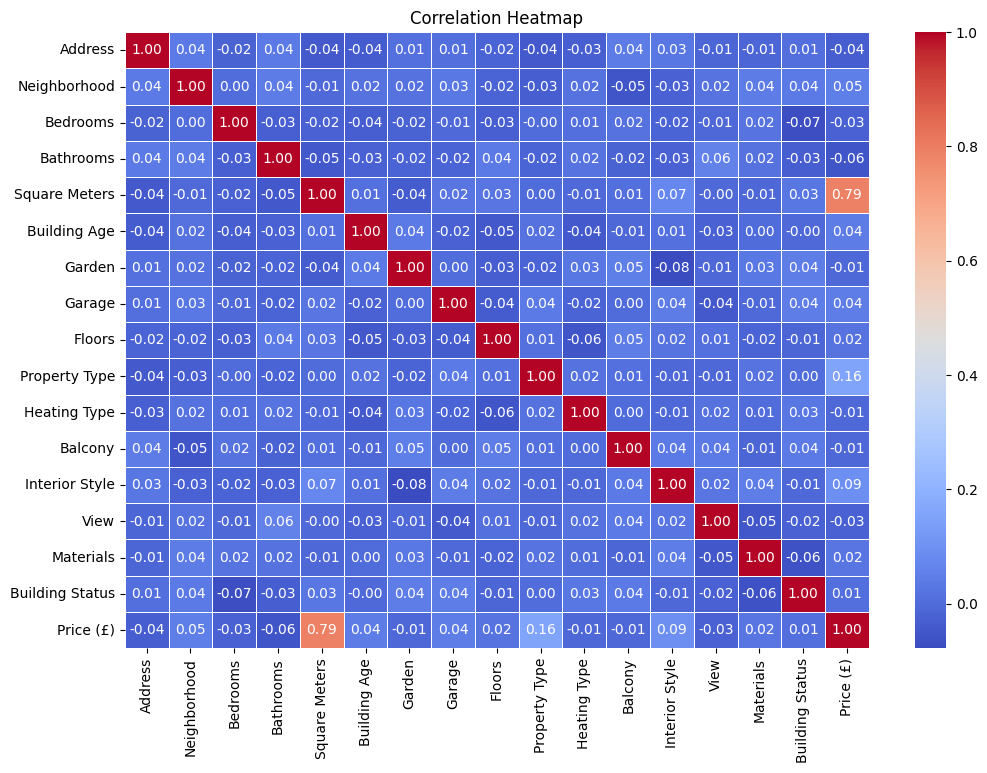

In [9]:
encoder = LabelEncoder()
categorical_columns = [
    "Address", "Neighborhood", "Garden", "Garage", "Property Type",
    "Heating Type", "Balcony", "Interior Style", "View",
    "Materials", "Building Status"
]

for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of regression model performance performance</div>

In [10]:
X = df.drop(columns=["Price (£)"])
y = df["Price (£)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, tol=1e-4),  
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=3),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Bayesian Ridge": BayesianRidge(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  

    mse = mean_squared_error(y_test, y_pred)  
    r2 = r2_score(y_test, y_pred)  
    
    return mse, r2

In [11]:
results = {}

for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"MSE": mse, "R²": r2}

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)

results_df

,MSE,R²
XGBoost,1.644296e+10,0.976047
Random Forest,6.592214e+10,0.903970
Decision Tree,9.900034e+10,0.855784
Polynomial Regression,1.947471e+11,0.716308
Linear Regression,2.289310e+11,0.666512
ElasticNet,2.297195e+11,0.665363
Bayesian Ridge,2.334838e+11,0.659880
KNN,3.222913e+11,0.530512
SVR,7.097217e+11,-0.033865


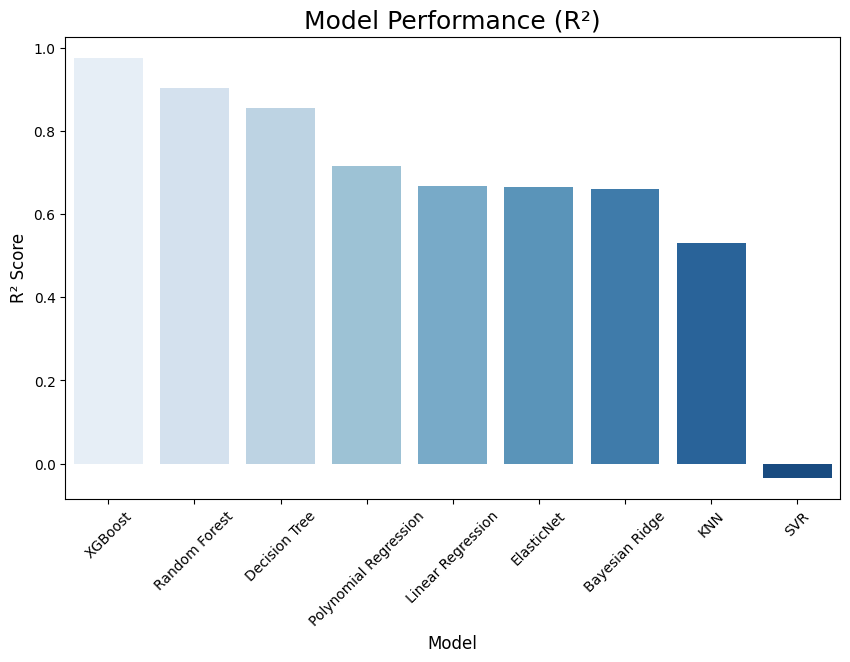

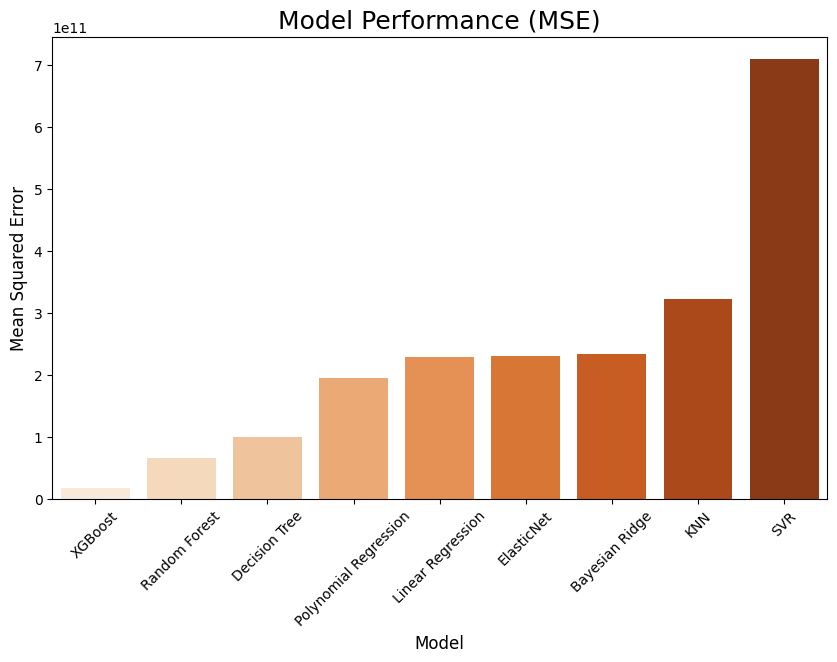

Best Model:
MSE    1.644296e+10
R²     9.760472e-01
Name: XGBoost, dtype: float64


In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="R²", data=results_df, palette="Blues")
plt.title("Model Performance (R²)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="MSE", data=results_df, palette="Oranges")
plt.title("Model Performance (MSE)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.xticks(rotation=45)
plt.show()

best_model = results_df.loc[results_df["R²"].idxmax()]
print("Best Model:")
print(best_model)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1)  
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

test_loss, test_mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")
print(f"R² Score: {r2}")

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 4057621856256.0000 - mae: 1819857.7500 - val_loss: 4049691738112.0000 - val_mae: 1833907.2500
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4028069314560.0000 - mae: 1824638.2500 - val_loss: 4048303161344.0000 - val_mae: 1833532.6250
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3942744850432.0000 - mae: 1797379.5000 - val_loss: 4043885510656.0000 - val_mae: 1832348.7500
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3986636144640.0000 - mae: 1808278.3750 - val_loss: 4031204294656.0000 - val_mae: 1828967.8750
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4174879129600.0000 - mae: 1855495.5000 - val_loss: 4000402112512.0000 - val_mae: 1820769.5000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3925165473792.0000 - mae: 1794163.1250 - val_loss: 3935241764864.0000 - val_mae: 1803347.7500
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3800478777344.0000 - m

In [14]:
from tensorflow.keras.layers import Conv1D, Flatten

X_train_np = X_train.to_numpy()  
X_test_np = X_test.to_numpy()    

X_train_np = X_train_np[..., None] 
X_test_np = X_test_np[..., None]    

cnn_model = Sequential([
    Input(shape=(X_train_np.shape[1], 1)), 
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_cnn = cnn_model.fit(X_train_np, y_train, validation_data=(X_test_np, y_test), 
                            epochs=100, batch_size=32, verbose=1)

test_loss_cnn, test_mae_cnn = cnn_model.evaluate(X_test_np, y_test)

y_pred_cnn = cnn_model.predict(X_test_np)
r2_cnn = r2_score(y_test, y_pred_cnn)

print(f"Test Loss (MSE): {test_loss_cnn}")
print(f"Test MAE: {test_mae_cnn}")
print(f"R² Score: {r2_cnn}")

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 3895354458112.0000 - mae: 1785350.7500 - val_loss: 4049190256640.0000 - val_mae: 1833786.1250
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4002815672320.0000 - mae: 1818920.0000 - val_loss: 4047120105472.0000 - val_mae: 1833256.2500
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4040597438464.0000 - mae: 1821257.1250 - val_loss: 4042583179264.0000 - val_mae: 1832090.6250
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4033030389760.0000 - mae: 1807866.3750 - val_loss: 4033586135040.0000 - val_mae: 1829774.0000
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4036321345536.0000 - mae: 1820887.0000 - val_loss: 4017555243008.0000 - val_mae: 1825642.0000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4016927932416.0000 - mae: 1806686.0000 - val_loss: 3991382261760.0000 - val_mae: 1818878.0000
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4201143074816.0000 - m

In [15]:
from tensorflow.keras.layers import SimpleRNN

rnn_model = Sequential([
    Input(shape=(X_train_np.shape[1], 1)),  
    SimpleRNN(32, activation='relu', return_sequences=False),
    Dropout(0.3),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_rnn = rnn_model.fit(X_train_np[..., None], y_train, validation_data=(X_test_np[..., None], y_test), epochs=100, batch_size=32, verbose=1)

test_loss_rnn, test_mae_rnn = rnn_model.evaluate(X_test_np[..., None], y_test)
y_pred_rnn = rnn_model.predict(X_test_np[..., None])
r2_rnn = r2_score(y_test, y_pred_rnn)

print(f"[RNN] Test Loss (MSE): {test_loss_rnn}, Test MAE: {test_mae_rnn}, R² Score: {r2_rnn}")

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3897858719744.0000 - mae: 1782209.8750 - val_loss: 4050073419776.0000 - val_mae: 1834012.1250
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4041023946752.0000 - mae: 1816327.6250 - val_loss: 4047176204288.0000 - val_mae: 1833245.7500
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3907778248704.0000 - mae: 1779155.0000 - val_loss: 2032372416512.0000 - val_mae: 1173743.8750
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2146170699776.0000 - mae: 1193284.6250 - val_loss: 1322088005632.0000 - val_mae: 897229.8750
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1968240197632.0000 - mae: 1114972.1250 - val_loss: 1378532458496.0000 - val_mae: 921112.1875
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1778563153920.0000 - mae: 1062427.0000 - val_loss: 1307401125888.0000 - val_mae: 908144.3750
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1852135702528.0000 - mae:

In [16]:
from tensorflow.keras.layers import LSTM

lstm_model = Sequential([
    Input(shape=(X_train_np.shape[1], 1)), 
    LSTM(32, activation='relu', return_sequences=False), 
    Dropout(0.3),  
    Dense(1)  
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_lstm = lstm_model.fit(X_train_np, y_train, validation_data=(X_test_np, y_test), 
                              epochs=100, batch_size=32, verbose=1)

test_loss_lstm, test_mae_lstm = lstm_model.evaluate(X_test_np, y_test)

y_pred_lstm = lstm_model.predict(X_test_np)
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f"[LSTM] Test Loss (MSE): {test_loss_lstm}, Test MAE: {test_mae_lstm}, R² Score: {r2_lstm}")

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3867560116224.0000 - mae: 1779034.3750 - val_loss: 4048624812032.0000 - val_mae: 1833625.5000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3915184340992.0000 - mae: 1802399.7500 - val_loss: 4015361622016.0000 - val_mae: 1824544.6250
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3858859032576.0000 - mae: 1768101.5000 - val_loss: 3510625370112.0000 - val_mae: 1675393.2500
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2893951008768.0000 - mae: 1427534.8750 - val_loss: 1367470899200.0000 - val_mae: 914466.7500
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1678789705728.0000 - mae: 1012456.1250 - val_loss: 1082508443648.0000 - val_mae: 824208.3125
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1921755381760.0000 - mae: 1086382.1250 - val_loss: 857472040960.0000 - val_mae: 728664.7500
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1393783734272.0000 - mae: 

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>

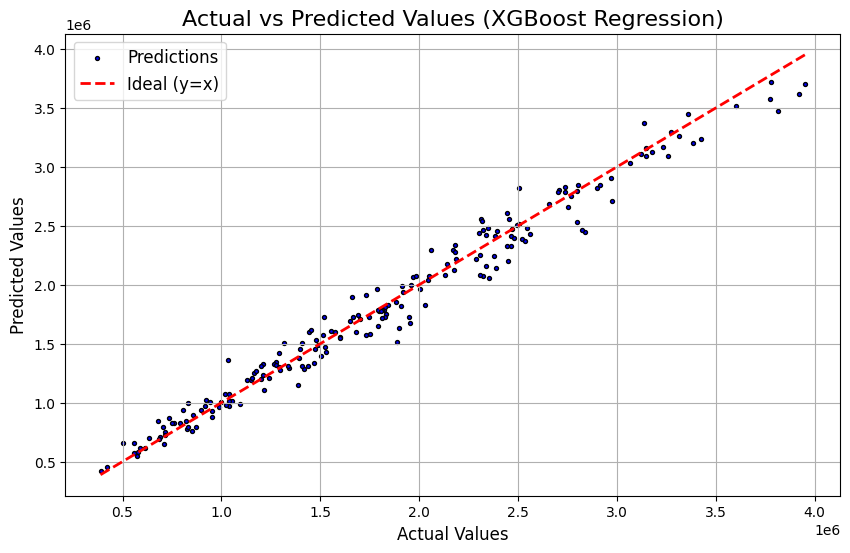

XGBoost Result: MSE = 16442963196.83717, R² = 0.976047225639972


In [17]:
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', s=8, edgecolor='black', label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal (y=x)')

plt.title('Actual vs Predicted Values (XGBoost Regression)', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'XGBoost Result: MSE = {mse}, R² = {r2}')

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Thanks !</div>